<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 분류 - 물고기 종류

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 데이터 로드

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/fish.csv')
df

,Type,Length,Depth,Kg
0,tuna,55.46,13.240930,8.631268
1,tuna,72.07,17.671346,19.288996
2,tuna,62.84,15.635367,13.140561
3,tuna,72.79,18.440841,19.669098
4,tuna,76.63,19.137488,23.021797
...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602
1496,mackerel,41.77,8.590338,1.476314
1497,mackerel,35.25,7.131067,0.851601
1498,mackerel,36.65,7.519112,1.243252


#### 길이의 제곱, 길이와 무게 비율 컬럼 생성

In [3]:
# Visual Python: Data Analysis > Frame
df['L2'] = df['Length'] * df['Length']
df['LKgRatio'] = df['Kg'] / df['Length']
df

,Type,Length,Depth,Kg,L2,LKgRatio
0,tuna,55.46,13.240930,8.631268,3075.8116,0.155631
1,tuna,72.07,17.671346,19.288996,5194.0849,0.267643
2,tuna,62.84,15.635367,13.140561,3948.8656,0.209111
3,tuna,72.79,18.440841,19.669098,5298.3841,0.270217
4,tuna,76.63,19.137488,23.021797,5872.1569,0.300428
...,...,...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602,1685.9236,0.032406
1496,mackerel,41.77,8.590338,1.476314,1744.7329,0.035344
1497,mackerel,35.25,7.131067,0.851601,1242.5625,0.024159
1498,mackerel,36.65,7.519112,1.243252,1343.2225,0.033922


#### 컬럼 추가(isTuna) - 참치: 1, 나머지: 0

In [4]:
# Visual Python: Data Analysis > Frame
df['isTuna'] = df['Type'].apply(lambda x: 1 if (x == 'tuna') else 0)
df

,Type,Length,Depth,Kg,L2,LKgRatio,isTuna
0,tuna,55.46,13.240930,8.631268,3075.8116,0.155631,1
1,tuna,72.07,17.671346,19.288996,5194.0849,0.267643,1
2,tuna,62.84,15.635367,13.140561,3948.8656,0.209111,1
3,tuna,72.79,18.440841,19.669098,5298.3841,0.270217,1
4,tuna,76.63,19.137488,23.021797,5872.1569,0.300428,1
...,...,...,...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602,1685.9236,0.032406,0
1496,mackerel,41.77,8.590338,1.476314,1744.7329,0.035344,0
1497,mackerel,35.25,7.131067,0.851601,1242.5625,0.024159,0
1498,mackerel,36.65,7.519112,1.243252,1343.2225,0.033922,0


#### 컬럼 추가( TypeNum) - 참치: 0, 연어: 1, 고등어:2

In [5]:
# Visual Python: Data Analysis > Frame
df['TypeNum'] = df['Type'].apply(lambda x: 0 if (x == 'tuna') else 1 if (x == 'salmon') else 2)
df

,Type,Length,Depth,Kg,L2,LKgRatio,isTuna,TypeNum
0,tuna,55.46,13.240930,8.631268,3075.8116,0.155631,1,0
1,tuna,72.07,17.671346,19.288996,5194.0849,0.267643,1,0
2,tuna,62.84,15.635367,13.140561,3948.8656,0.209111,1,0
3,tuna,72.79,18.440841,19.669098,5298.3841,0.270217,1,0
4,tuna,76.63,19.137488,23.021797,5872.1569,0.300428,1,0
...,...,...,...,...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602,1685.9236,0.032406,0,2
1496,mackerel,41.77,8.590338,1.476314,1744.7329,0.035344,0,2
1497,mackerel,35.25,7.131067,0.851601,1242.5625,0.024159,0,2
1498,mackerel,36.65,7.519112,1.243252,1343.2225,0.033922,0,2


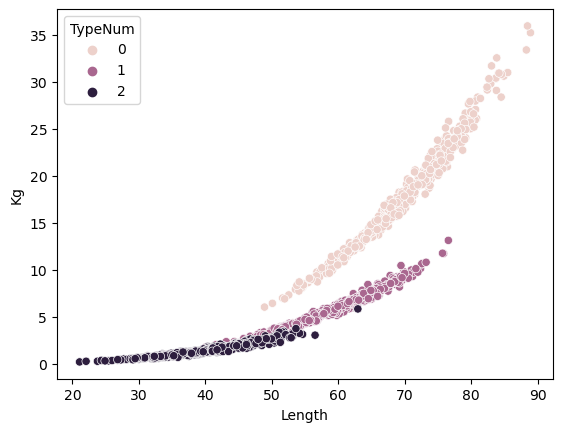

In [6]:
# Visual Python: Visualization > Seaborn
sns.scatterplot(data=df, x='Length', y='Kg', hue='TypeNum')
plt.show()

# 1. Logistic Regression
- X = ['Length','Depth'], y = isTuna

In [7]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Length', 'Depth']], df['isTuna'])

In [8]:
# Visual Python: Machine Learning > Classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [9]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [11]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [12]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,All
isTuna,,,
0,232,30,262
1,24,89,113
All,256,119,375


In [13]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       262
           1       0.75      0.79      0.77       113

    accuracy                           0.86       375
   macro avg       0.83      0.84      0.83       375
weighted avg       0.86      0.86      0.86       375



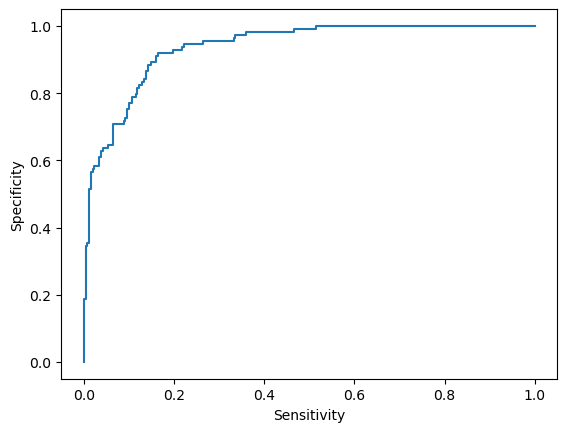

In [14]:
# Visual Python: Machine Learning > Model Info
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, model.decision_function(X_test))                                    
plt.plot(fpr, tpr, label='ROC Curve')                                    
plt.xlabel('Sensitivity')                                    
plt.ylabel('Specificity')                                    
plt.show()

In [15]:
# Visual Python: Machine Learning > Model Info
from sklearn import metrics

metrics.roc_auc_score(y_test, model.decision_function(X_test))

0.9380868742822401

In [16]:
# Visual Python: Machine Learning > Model Info
def vp_create_permutation_importances(model, X_train, y_train, scoring=None, sort=False):
    from sklearn.inspection import permutation_importance
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(X_train.shape[1]) ]
                        
    imp = permutation_importance(model, X_train, y_train, scoring=scoring)

    df_i = pd.DataFrame(imp['importances_mean'], index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_permutation_importances(model, X_train, y_train, scoring=None, sort=False, top_count=0):
    df_i = vp_create_permutation_importances(model, X_train, y_train, scoring=scoring, sort=sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

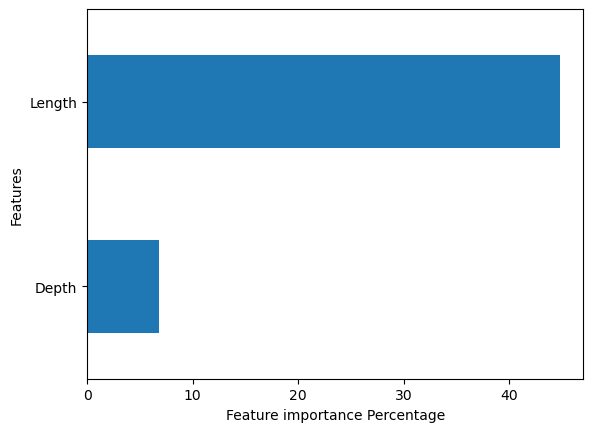

In [17]:
# Visual Python: Machine Learning > Model Info
from sklearn.inspection import permutation_importance

vp_plot_permutation_importances(model, X_train, y_train, sort=True)

---

# 2. Support Vector Machine
- X = ['Length','Depth'], y = TypeNum

In [18]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Length', 'Depth']], df['TypeNum'])

In [19]:
# Visual Python: Machine Learning > Classifier
from sklearn.svm import SVC

model = SVC()

In [20]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

SVC()

In [21]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0,
       2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1,

In [22]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,2,All
TypeNum,,,,
0,87,27,0,114
1,23,105,8,136
2,0,7,118,125
All,110,139,126,375


In [23]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       114
           1       0.76      0.77      0.76       136
           2       0.94      0.94      0.94       125

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375



## 2.1 Support Vector Machine - PCA
- X = ['Length','Depth','Kg','L2','LKgRatio'], y = TypeNum

In [24]:
# Visual Python: Machine Learning > Dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [25]:
# Visual Python: Machine Learning > Fit/Predict
X_pca = pca.fit_transform(df[['Length', 'Depth', 'Kg', 'L2', 'LKgRatio']])
X_pca

array([[-3.01995388e+02,  4.05993958e-01],
       [ 1.81637260e+03,  2.53278514e+00],
       [ 5.71104439e+02,  1.04257790e+00],
       ...,
       [-2.13537817e+03,  2.83624877e+00],
       [-2.03470825e+03,  2.53354514e+00],
       [-2.33272904e+03,  4.08752781e+00]])

In [26]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, df['TypeNum'])

In [27]:
# 모델 생성
model = SVC(kernel='linear')

# 모델 학습
model.fit(X_train, y_train)

# 결과 예측
pred = model.predict(X_test)
pred

array([1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0,

In [28]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,2,All
TypeNum,,,,
0,135,0,0,135
1,0,115,5,120
2,0,4,116,120
All,135,119,121,375


In [29]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.97      0.96      0.96       120
           2       0.96      0.97      0.96       120

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.97       375
weighted avg       0.98      0.98      0.98       375



# 3. Decision Tree
- X = ['Length','Depth','Kg','L2','LKgRatio'], y = TypeNum

In [30]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Length', 'Depth', 'Kg', 'L2', 'LKgRatio']], df['TypeNum'])

In [31]:
# Visual Python: Machine Learning > Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [32]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1,
       2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2,

In [34]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,2,All
TypeNum,,,,
0,125,0,0,125
1,1,105,1,107
2,0,1,142,143
All,126,106,143,375


In [35]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       0.99      0.98      0.99       107
           2       0.99      0.99      0.99       143

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



# 4. Random Forest
- X = ['Length','Depth','Kg','L2','LKgRatio'], y = TypeNum

In [36]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Length', 'Depth', 'Kg', 'L2', 'LKgRatio']], df['TypeNum'])

In [37]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)

In [38]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0,
       0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0,

In [40]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,2,All
TypeNum,,,,
0,121,0,0,121
1,3,115,4,122
2,0,3,129,132
All,124,118,133,375


In [41]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       0.97      0.94      0.96       122
           2       0.97      0.98      0.97       132

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375



In [42]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

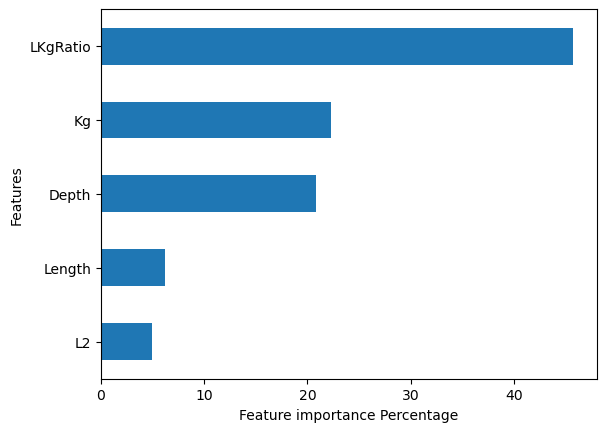

In [43]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True)

# 5. 하이퍼 파라미터 튜닝(매개변수 최적화)

In [44]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Length', 'Depth', 'Kg', 'L2', 'LKgRatio']], df['TypeNum'])

In [45]:
# Visual Python: Machine Learning > GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

gs = GridSearchCV(RandomForestClassifier(), {'n_estimators': [10,50,100,200,500]}, cv=5)

In [46]:
# Visual Python: Machine Learning > Fit/Predict
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 500]})

In [47]:
# Visual Python: Machine Learning > Model Info
best_score = gs.best_score_
best_score

0.992

In [48]:
# Visual Python: Machine Learning > Model Info
best_estimator = gs.best_estimator_
best_estimator

RandomForestClassifier(n_estimators=200)

In [49]:
# Visual Python: Machine Learning > Model Info
best_params = gs.best_params_
best_params

{'n_estimators': 200}

In [50]:
# Visual Python: Machine Learning > Fit/Predict
pred = gs.predict(X_test)
pred

array([2, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0,

In [51]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,2,All
TypeNum,,,,
0,144,0,0,144
1,0,121,0,121
2,0,0,110,110
All,144,121,110,375


In [52]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       110

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



---

In [53]:
# End of file